In [3]:
!pip install xgboost

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [5]:
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Exploratory Data Analysis

<AxesSubplot:>

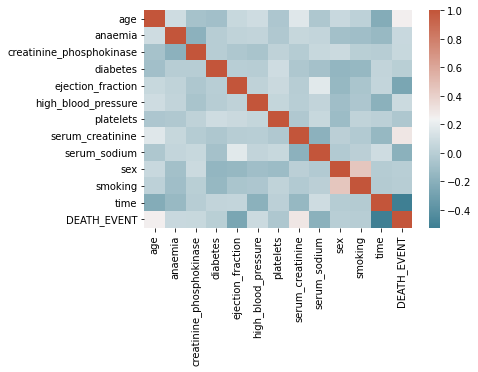

In [7]:
# Calculating a correlation matrix
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset_normalized = preprocessing.normalize(dataset)
df_normalized = pd.DataFrame(dataset_normalized, columns=dataset.columns)
x = dataset.iloc[:,[4,7]].values
corr = dataset.corr(method="pearson")# plotting the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

C:\Users\Rahul Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


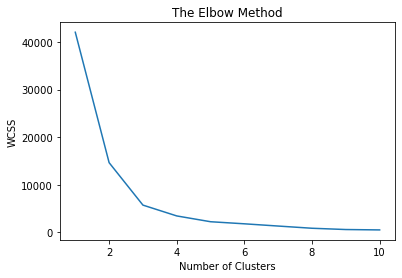

In [8]:
# K-Means Clustering based on serum creatine levels and ejection fraction
x = dataset.iloc[:,[4,7]].values
## Within cluster sum of squares (wcss)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
## Training the data
kmeans= KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 2 0 0 0 2 0 1 1 2 2 0 0 2 0 1 2 0 0 1 0 0 2 1 0 2 2 2 2 0 2 2 2 0 1 2 1
 1 0 2 0 0 2 1 1 2 0 2 0 0 0 0 1 1 2 0 2 2 0 0 0 2 2 2 1 0 0 0 0 0 2 2 2 1
 0 0 1 2 2 2 2 1 0 1 0 1 2 1 2 0 2 2 1 0 2 1 0 1 0 2 0 2 0 0 1 0 2 2 2 2 1
 2 0 1 2 2 1 1 1 2 1 2 2 0 2 1 0 1 0 2 1 2 2 1 2 2 1 0 2 0 2 2 0 2 0 0 0 1
 0 2 2 1 2 2 2 0 2 0 1 2 2 2 2 2 0 2 1 0 2 2 2 2 1 0 2 1 2 1 1 2 0 0 0 2 0
 0 1 0 2 2 2 1 2 0 0 2 2 0 0 2 2 1 1 0 2 2 2 2 2 2 0 1 1 0 2 2 1 1 2 2 0 1
 2 0 0 1 0 2 0 0 0 2 2 2 2 1 1 0 2 2 2 0 2 2 2 2 0 0 2 2 0 2 2 2 1 0 2 2 0
 1 2 2 0 1 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 1 2 2 1 2 2 2 2 2
 1 2 2]


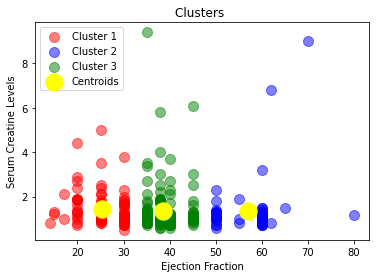

In [10]:
## Plot
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0, 1], s=100, c="red", label= 'Cluster 1', alpha=0.5)
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1, 1], s=100, c="blue", label= 'Cluster 2', alpha=0.5)
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2, 1], s=100, c="green", label= 'Cluster 3', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", label="Centroids")
plt.title("Clusters ")
plt.xlabel("Ejection Fraction")
plt.ylabel("Serum Creatine Levels")
plt.legend()
plt.show()

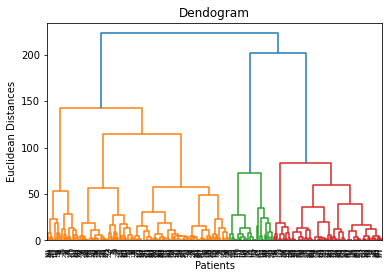

In [11]:
# Agglomerative Hierarchical Clustering based in age, serum creatine levels, and ejection fraction
x = dataset.iloc[:,[4,7,0]].values

## Dendogram : Minimum variance methods 
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title("Dendogram")
plt.xlabel("Patients")
plt.ylabel("Euclidean Distances")
plt.show()

In [12]:
# PCA Plot
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Test Train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Pre-processing features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Two dimensions of variation
x_train= pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Fitting data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)


## Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) #three customer segments

[[36  1]
 [13 10]]


0.7666666666666667

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


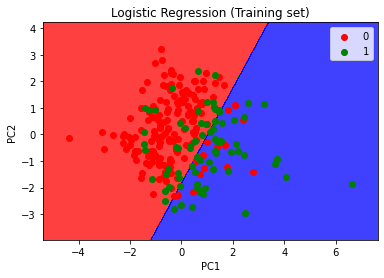

In [13]:
## Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


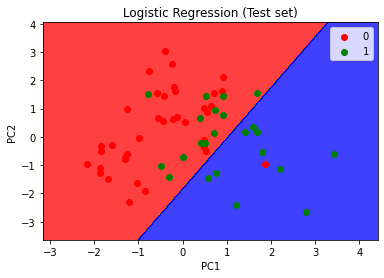

In [14]:
## Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# ML Heart Failure Prediction

**Classifiers used:**
1. Random Forest Classifier
2. Logistic Regression 
3. K-Nearest Neighbors
4. Support Vector Classification (linear)
5. Support Vector Classification (radial basis function)
6. Gaussian Naive Bayes
7. Decision Tree
8. XGBoost 



In [15]:
def data_split(x, y, test_size=0.2, shuffle=True, random_state=0):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=shuffle, random_state=random_state)
    return x_train, y_train, x_test, y_test

In [16]:
def classification_model(x_train, y_train, x_test, y_test, model='LogisticRegression', save=False, graph=False, metrics:list=['accuracy_score'], **kwargs):

    # Instantiating model
    mod = eval(model)(**kwargs)
    
    # Fitting models
    mod.fit(x, y)
 
    # Evaluation
    y_pred = mod.predict(x_test)
    perf = {i: eval(i)(y_test, y_pred) for i in metrics}
    perf_stats = pd.Series(list(perf.values()), index=list(perf.keys()), name=model)
    cm = confusion_matrix(y_test, y_pred)
    return perf_stats, cm

In [17]:
# Data
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
x_train, y_train, x_test, y_test = data_split(x, y)
 
# Classification model execution
forest, _ = classification_model(x_train, y_train, x_test, y_test, model='RandomForestClassifier', metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'], n_estimators=20, criterion='entropy', random_state=0, max_depth=5)

logreg, _= classification_model(x_train, y_train, x_test, y_test, model='LogisticRegression', metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'], penalty='l1', C=0.2, solver='liblinear', random_state=0, save=True)

KNN, _ = classification_model(x_train, y_train, x_test, y_test, model='KNeighborsClassifier', metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'], weights='distance', p=2)
 
svc, _ = classification_model(x_train, y_train, x_test, y_test, model='SVC', metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'], kernel='linear', random_state=0, gamma='auto', C=0.1)
 
svc_r, _ = classification_model(x_train, y_train, x_test, y_test, model='SVC', metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'], kernel='rbf', random_state=0, gamma='auto', C=0.1)
 
GNB, _ = classification_model(x_train, y_train, x_test, y_test, model='GaussianNB', metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'])
 
tree, _ = classification_model(x_train, y_train, x_test, y_test, model='DecisionTreeClassifier', metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'], criterion='entropy', max_depth=5, random_state=0)
    
xgboost, _ = classification_model(x_train, y_train, x_test, y_test, model="XGBClassifier", metrics=['accuracy_score', 'precision_score', 'recall_score', 'f1_score'], use_label_encoder=False, eval_metric="logloss")

print(pd.concat([forest, logreg, KNN, svc, svc_r, GNB, tree, xgboost], axis=1).T)

C:\Users\Rahul Singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        accuracy_score  precision_score  recall_score  \
RandomForestClassifier        0.933333         1.000000      0.826087   
LogisticRegression            0.766667         0.800000      0.521739   
KNeighborsClassifier          1.000000         1.000000      1.000000   
SVC                           0.766667         0.800000      0.521739   
SVC                           0.616667         0.000000      0.000000   
GaussianNB                    0.766667         0.909091      0.434783   
DecisionTreeClassifier        0.933333         0.913043      0.913043   
XGBClassifier                 1.000000         1.000000      1.000000   

                        f1_score  
RandomForestClassifier  0.904762  
LogisticRegression      0.631579  
KNeighborsClassifier    1.000000  
SVC                     0.631579  
SVC                     0.000000  
GaussianNB              0.588235  
DecisionTreeClassifier  0.913043  
XGBClassifier           1.000000  


In [18]:
# Random Forest Classification
## Training the Random Forest model
classifier = RandomForestClassifier(n_estimators= 20, criterion="entropy", random_state=0, max_depth=5)
classifier.fit(x_train, y_train)

## Prediction 
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]
[[35  9]
 [ 2 14]]


0.8166666666666667

In [19]:
# Decision Tree Classification
## Training the Decision Tree Classification model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=5)
classifier.fit(x_train, y_train)

## Prediction 
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Confusion Matrix
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]
[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]
[[34  3]
 [ 4 19]]


0.8833333333333333